In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [4]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart.csv


In [5]:

df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df.fillna(method='ffill', inplace=True)  # Or use dropna() if preferred


/tmp/ipython-input-7-2160327052.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Or use dropna() if preferred


In [8]:
X = df.drop('target', axis=1)
y = df['target']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [11]:
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



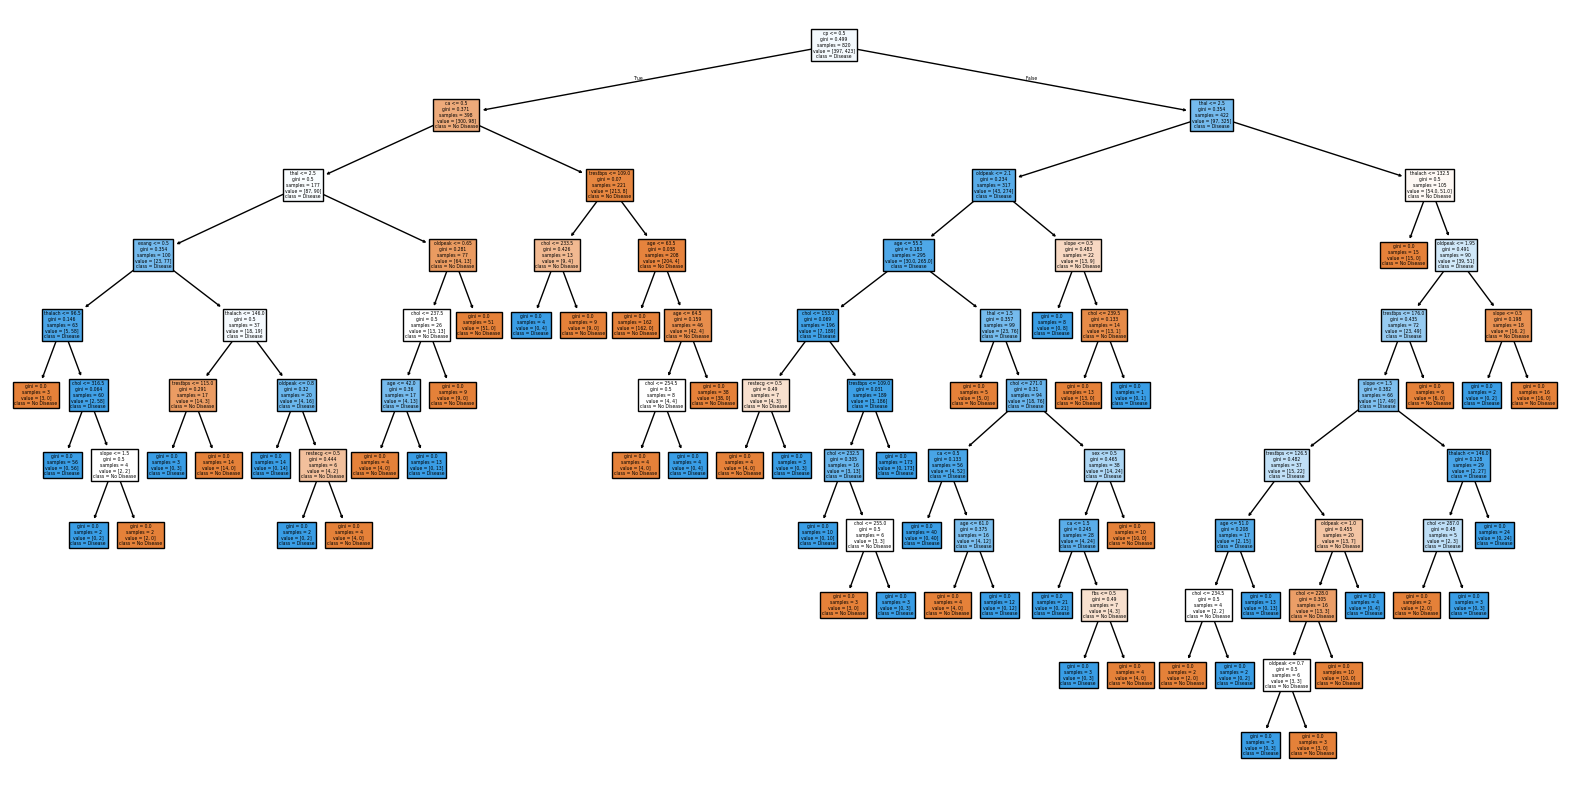

In [12]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.show()


In [13]:
dt_model_limited = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model_limited.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [14]:
y_pred_limited = dt_model_limited.predict(X_test)
print("Limited Tree Accuracy:", accuracy_score(y_test, y_pred_limited))
print("\nClassification Report:\n", classification_report(y_test, y_pred_limited))



Limited Tree Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



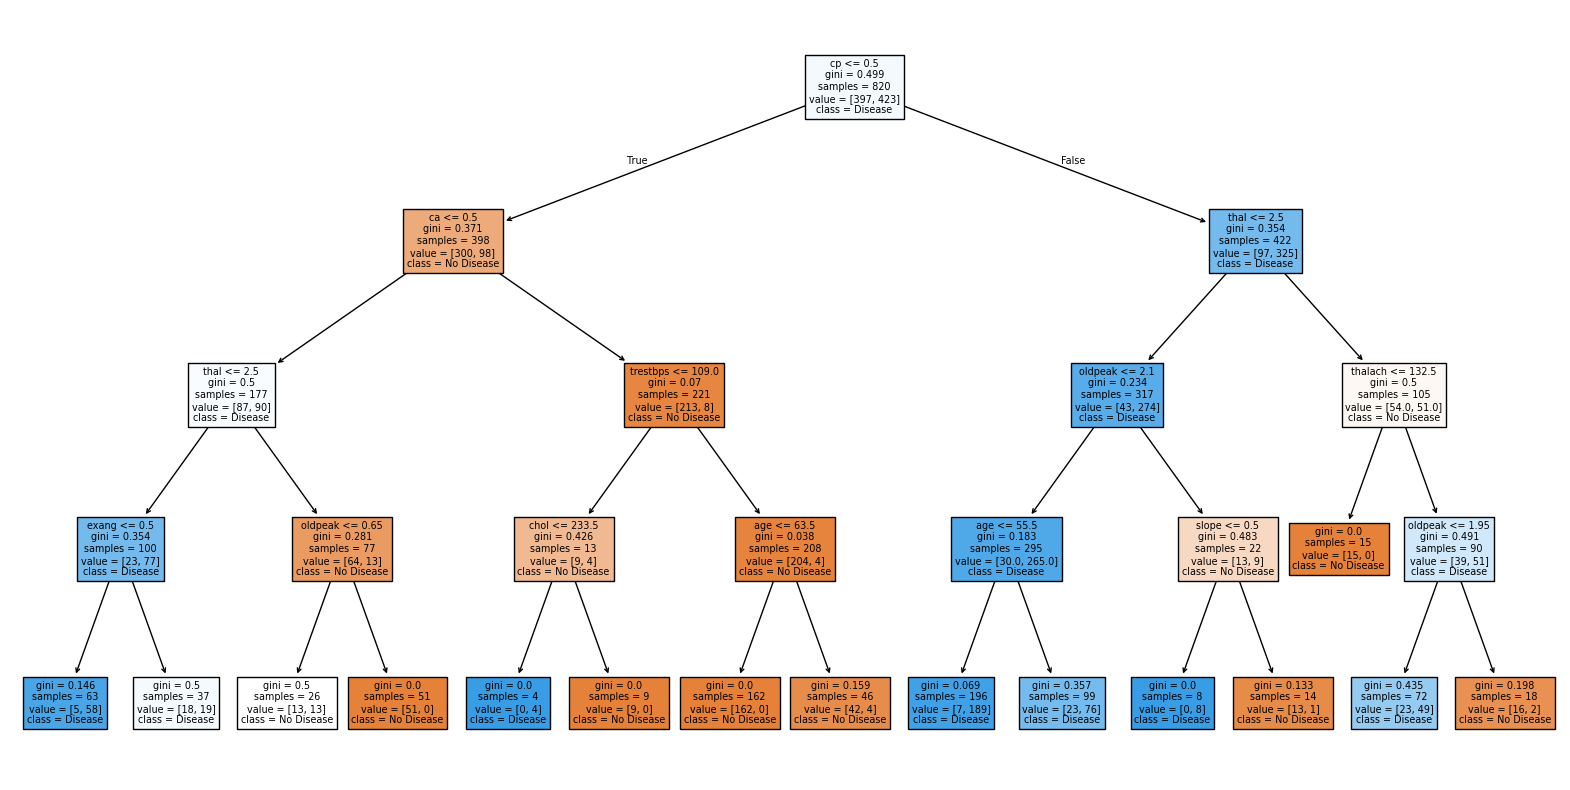

In [15]:
plt.figure(figsize=(20,10))
plot_tree(dt_model_limited, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.show()


In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
y_pred_rf = rf_model.predict(X_test)


In [18]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [19]:
importances = rf_model.feature_importances_
feature_names = X.columns

# Combine into a DataFrame
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_importance


,Feature,Importance
2,cp,0.135072
11,ca,0.127327
7,thalach,0.122169
9,oldpeak,0.121905
12,thal,0.110518
0,age,0.077908
4,chol,0.074822
3,trestbps,0.071171
8,exang,0.057594
10,slope,0.045782


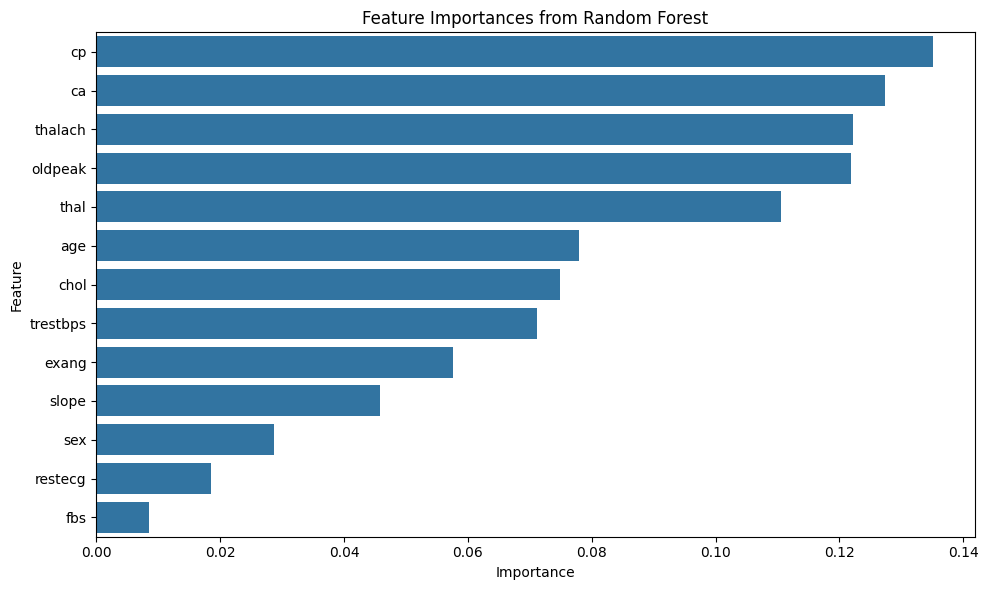

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()


In [21]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(dt_model, X, y, cv=5)
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Average Accuracy:", dt_scores.mean())


Decision Tree Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average Accuracy: 1.0


In [22]:
rf_scores = cross_val_score(rf_model, X, y, cv=5)
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Average Accuracy:", rf_scores.mean())


Random Forest Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Average Accuracy: 0.9970731707317073
